# PROPHET FORECASTING

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Load Train and Test Daily Delhi Climate data

In [14]:

train_df = pd.read_csv('DailyDelhiClimateTrain.csv', parse_dates=['date'])
test_df = pd.read_csv('DailyDelhiClimateTest.csv', parse_dates=['date'])

## Do Some Feature Engineering

In [15]:
# Rename columns and keep only date and humidity
train_df = train_df[['date', 'humidity']].rename(columns={'date': 'ds', 'humidity': 'y'})
test_df = test_df[['date', 'humidity']].rename(columns={'date': 'ds', 'humidity': 'y'})

## Train and Fit the Prophet Model

In [ ]:

model = Prophet(interval_width=0.95)
model.fit(train_df)

## Forecast on Test Data

In [17]:

future = test_df[['ds']].copy()
forecast = model.predict(future)
# keep only relevant columns from forecast
cols = ['ds', 'yhat', 'yhat_lower', 'yhat_upper']
forecast_sub = forecast[cols]

y_true = test_df['y'].to_numpy()
yhat       = forecast['yhat'].to_numpy()
yhat_lower = forecast['yhat_lower'].to_numpy()
yhat_upper = forecast['yhat_upper'].to_numpy()

## Plot Actual Test Data, Predicted Test Data, and Prediction Interval

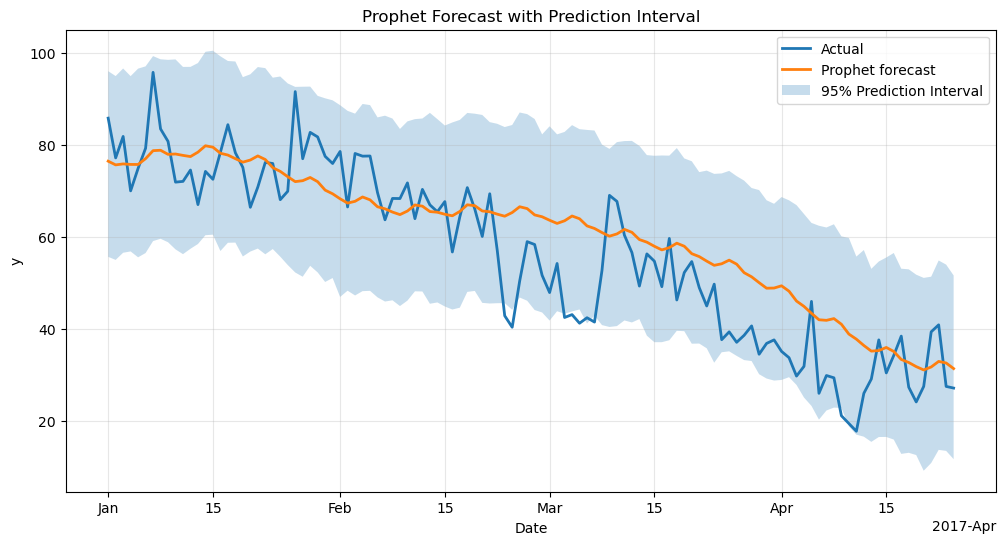

In [18]:
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter

# Predict on the test horizon you already prepared
# forecast has: ['ds','yhat','yhat_lower','yhat_upper']

# (Optional, but robust) align by date so we only plot matching rows
plot_df = test_df[['ds','y']].merge(
    forecast[['ds','yhat','yhat_lower','yhat_upper']],
    on='ds', how='inner'
).sort_values('ds')

fig, ax = plt.subplots(figsize=(12, 6))

# Actuals
ax.plot(plot_df['ds'], plot_df['y'], label='Actual', linewidth=2)

# Point forecast
ax.plot(plot_df['ds'], plot_df['yhat'], label='Prophet forecast', linewidth=2)

# 95% prediction interval
ax.fill_between(
    plot_df['ds'],
    plot_df['yhat_lower'],
    plot_df['yhat_upper'],
    alpha=0.25,
    label=f'{int(model.interval_width*100)}% Prediction Interval'
)

# Pretty date axis
locator = AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(ConciseDateFormatter(locator))

ax.set_title('Prophet Forecast with Prediction Interval')
ax.set_xlabel('Date')
ax.set_ylabel('y')
ax.grid(True, alpha=0.3)
ax.legend()

plt.savefig("ProphetforecastPLOT", dpi=200, bbox_inches='tight')
plt.show()

## Compute Errors and Prediction Interval Coverage

In [19]:


# MSE
mse = mean_squared_error(y_true, y_pred)
print(f"Test MSE (Prophet): {mse:.4f}")

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(y_true,y_pred)

print(f"Test MSE:  {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE:  {mae:.4f}")

# Coverage
inside = ((y_true >= y_lower) & (y_true <= y_upper)).mean() * 100
print(f"{int(100 * model.interval_width)}% Prediction Interval Coverage (Prophet): {inside:.2f}%")

Test MSE (Prophet): 105.2634
Test MSE:  105.2634
Test RMSE: 10.2598
Test MAE:  8.2826
95% Prediction Interval Coverage (Prophet): 93.86%


## Interpretability plots

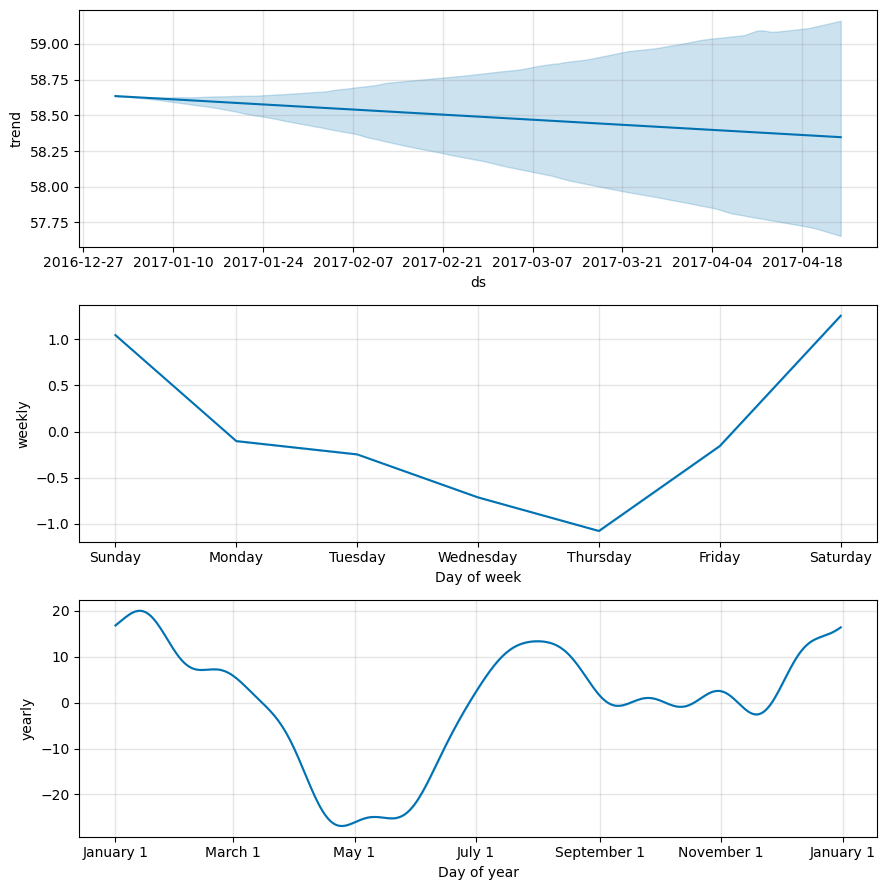

In [24]:

# Plot components: trend, seasonality, holidays, etc.
# Save to file


fig2= model.plot_components(forecast)
fig2.savefig("prophet_components.png", dpi=300, bbox_inches='tight')


